In [1]:
import re
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import math
from time import gmtime, strftime
%matplotlib inline

In [2]:
#Plots Setting
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=10)   # fontsize of the figure title
plt.rc('lines', linewidth=1, color='r')
plt.rcParams['figure.figsize']=(8,6)
Set1=['Saffron', 'Green','Yellow','pink', 'Navy','purple','black','Blue']

In [3]:
wine=pd.read_csv('wine.csv')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.columns.unique()

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine.isna().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
wine.Class.unique()

array([1, 2, 3], dtype=int64)

In [8]:
len(wine[wine.Class==1])

59

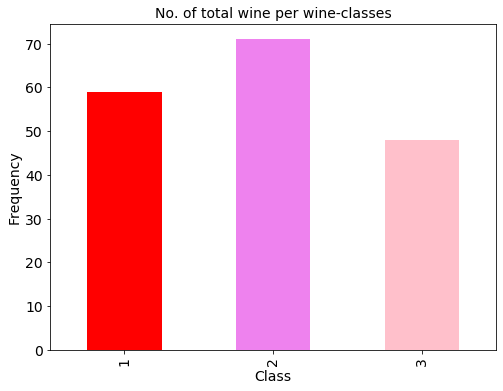

In [56]:
count_classes = pd.value_counts(wine['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['Red','violet', 'pink'])
plt.title("No. of total wine per wine-classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

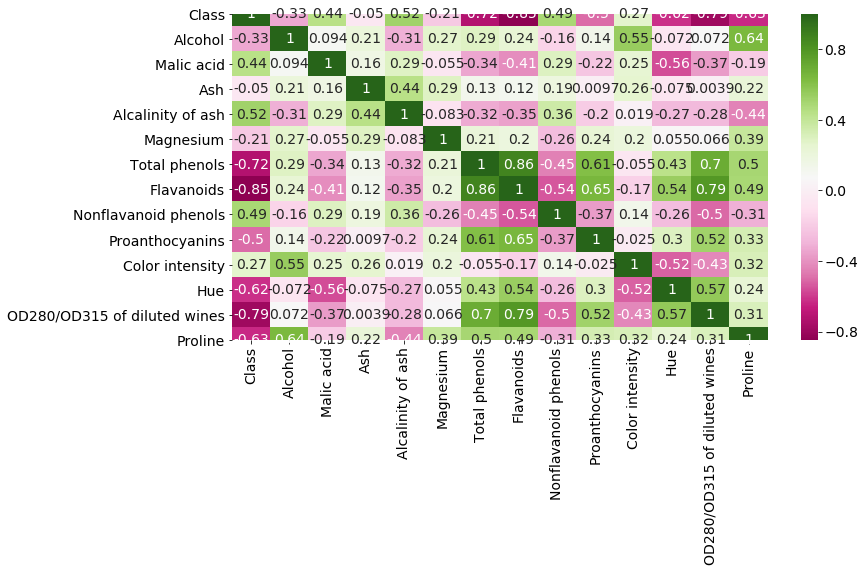

In [21]:
wine_corr=wine.iloc[:,:].corr();
plt.figure(figsize=(12,6))
sns.heatmap(wine_corr, cmap='PiYG', annot=True)

In [10]:
wine.head(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [11]:
wine[wine.Class==1]['Magnesium'].describe()

count     59.000000
mean     106.338983
std       10.498949
min       89.000000
25%       98.000000
50%      104.000000
75%      114.000000
max      132.000000
Name: Magnesium, dtype: float64

In [12]:
wine[wine.Class==1]['Color intensity'].describe()

count    59.000000
mean      5.528305
std       1.238573
min       3.520000
25%       4.550000
50%       5.400000
75%       6.225000
max       8.900000
Name: Color intensity, dtype: float64

In [13]:
wine['Color intensity'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: Color intensity, dtype: float64

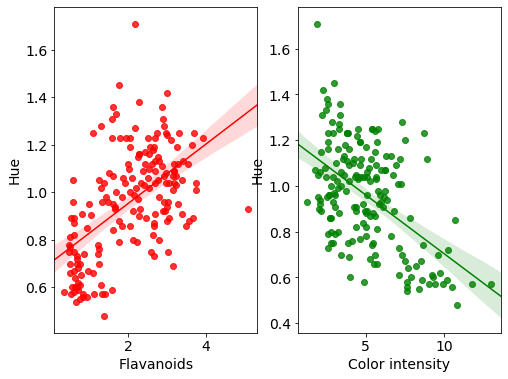

In [65]:
fig, axes = plt.subplots(1, 2)
sns.regplot(x='Flavanoids',y='Hue', color='red', data=wine, ax=axes[0])
sns.regplot(x='Color intensity',y='Hue', color='green', data=wine, ax=axes[1])

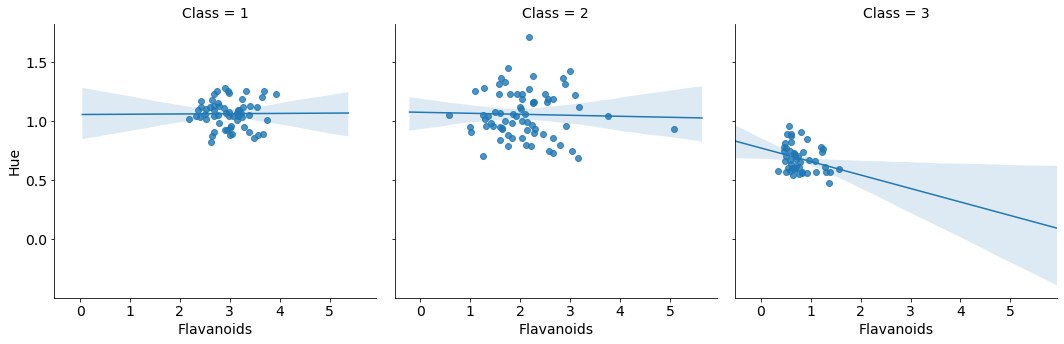

In [57]:
sns.lmplot(x='Flavanoids',y='Hue', col='Class', data=wine, aspect=1)